# Team 8 Presentation 

# PRINCIPAL COMPONENT ANALYSIS (PCA) AS AN IDEAL TOOL FOR ANALYSING ON-FARM RESEARCH DATA

In [1]:
##Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
## Load Dataset

data = pd.read_excel('Onfarm_research_data.xlsx')
data.head()

,Field,pH,OC,TN,P,K,Ca,Mg,Mn,SAND,SILT,CLAY
0,1,5.7,0.49,0.044,5.2,0.17,2.25,0.57,0.07,42,48,10
1,2,7.1,0.39,0.039,1.1,0.29,4.30,1.12,0.07,54,30,16
2,3,6.0,0.54,0.045,24.4,0.31,2.66,0.71,0.07,48,44,8
3,4,5.5,0.34,0.035,2.2,0.21,2.10,0.63,0.10,54,38,8
4,5,6.2,0.54,0.045,3.1,0.32,4.40,1.01,0.10,52,32,16


In [3]:
data_features = data[data.columns[1:]]
print(data_features)

data_independent = data.Field
print(data_independent)

     pH    OC     TN     P     K    Ca    Mg    Mn  SAND  SILT  CLAY
0   5.7  0.49  0.044   5.2  0.17  2.25  0.57  0.07    42    48    10
1   7.1  0.39  0.039   1.1  0.29  4.30  1.12  0.07    54    30    16
2   6.0  0.54  0.045  24.4  0.31  2.66  0.71  0.07    48    44     8
3   5.5  0.34  0.035   2.2  0.21  2.10  0.63  0.10    54    38     8
4   6.2  0.54  0.045   3.1  0.32  4.40  1.01  0.10    52    32    16
5   5.8  0.32  0.037   4.0  0.15  1.88  0.42  0.04    68    26     6
6   6.0  0.29  0.032  10.3  0.38  4.91  0.89  0.08    58    30    12
7   6.1  0.27  0.045   4.4  0.31  4.02  0.94  0.07    58    30    12
8   5.9  0.21  0.039  12.3  0.15  1.81  0.57  0.03    68    26     6
9   6.4  0.10  0.025   7.9  0.18  2.59  0.68  0.05    72    22     6
10  6.3  0.45  0.044   4.9  0.23  2.42  0.70  0.04    68    22    10
11  5.8  0.18  0.039  11.0  0.17  2.66  0.67  0.10    58    34     8
12  6.6  0.25  0.030   2.9  0.26  2.73  0.78  0.07    60    32     8
13  6.2  0.66  0.058   2.5  0.17  

# Step 1: Standardization

In [4]:
# Standardizing the features
data_features_standard = StandardScaler().fit_transform(data_features)
data_features_standard

array([[-0.94353677,  0.86604112,  0.62106956, -0.52473174, -0.79607158,
        -0.94941339, -1.11102727, -0.34874292, -2.0463169 ,  2.37577257,
         0.        ],
       [ 2.45319559,  0.2399873 , -0.06059215, -0.90476317,  0.84156138,
         1.10653462,  1.9190471 , -0.34874292, -0.52216362, -0.27853885,
         1.96396101],
       [-0.21566555,  1.17906803,  0.7574019 ,  1.25492764,  1.11450021,
        -0.53822379, -0.33973561, -0.34874292, -1.28424026,  1.78592559,
        -0.65465367],
       [-1.42878424, -0.07303961, -0.60592152, -0.80280352, -0.25019392,
        -1.09984861, -0.7804737 ,  0.69748583, -0.52216362,  0.90115511,
        -0.65465367],
       [ 0.26958193,  1.17906803,  0.7574019 , -0.71938199,  1.25096962,
         1.20682477,  1.31303222,  0.69748583, -0.77618917,  0.01638464,
         1.96396101],
       [-0.70091303, -0.19825038, -0.33325684, -0.63596046, -1.0690104 ,
        -1.32048693, -1.93741118, -1.39497166,  1.2560152 , -0.86838584,
        -1.309

# Step 2: Finding Covariance Matrix

In [5]:
#mean_vec = np.mean(data_features_standard, axis=0)
#cov_mat = (data_features_standard - mean_vec).T.dot((data_features_standard - mean_vec)) / (data_features_standard.shape[0]-1)
#print('Covariance matrix n%s' %cov_mat)

In [6]:
cov_mat = np.cov(data_features_standard.T)
cov_mat

array([[ 1.05882353,  0.26030722, -0.01578206, -0.42937704,  0.32266721,
         0.41642435,  0.63085537, -0.00995451,  0.04028276, -0.23197058,
         0.41110112],
       [ 0.26030722,  1.05882353,  0.81669559, -0.20080982,  0.31385606,
         0.38215141,  0.41277277,  0.25942959, -0.70083953,  0.55300885,
         0.57860955],
       [-0.01578206,  0.81669559,  1.05882353, -0.11409394,  0.0846354 ,
         0.34621651,  0.34711941,  0.20416356, -0.59779635,  0.44096974,
         0.56175295],
       [-0.42937704, -0.20080982, -0.11409394,  1.05882353,  0.01300907,
         0.02269671, -0.05884029,  0.18615505,  0.03509552,  0.03901277,
        -0.17704351],
       [ 0.32266721,  0.31385606,  0.0846354 ,  0.01300907,  1.05882353,
         0.67442426,  0.70606701,  0.0307953 , -0.38507246,  0.17953781,
         0.59384958],
       [ 0.41642435,  0.38215141,  0.34621651,  0.02269671,  0.67442426,
         1.05882353,  0.96440932,  0.54849779, -0.41146657,  0.08015036,
         0.882

# Step 3: Calculation Eigen Values and Eigen Vector

In [7]:
#Calculating eigenvectors and eigenvalues on covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[ 1.75208507e-01  4.51043857e-01  2.90148117e-01  1.25032919e-01
  -2.64917150e-01 -6.49115741e-01 -2.12457984e-01 -9.86876135e-02
  -3.45505979e-01 -1.60590970e-02 -9.66430615e-17]
 [ 3.37435252e-01 -2.10368323e-01  3.36320370e-01 -6.29849514e-03
   2.20828226e-01 -3.75859907e-01  5.47555112e-01  3.81223090e-01
   2.74175493e-01 -1.35557871e-01  1.60003263e-16]
 [ 2.87957328e-01 -2.65185563e-01  2.83514239e-01  1.51193957e-01
   5.82929310e-01  5.30172525e-02 -1.03061333e-01 -5.40238311e-01
  -2.45332211e-01  1.95532306e-01 -3.77075181e-16]
 [-5.43548763e-02 -1.50571226e-01 -6.70138310e-01 -1.65547920e-01
   4.08496010e-01 -5.30773844e-01 -1.76400967e-01  1.05172038e-01
  -8.41082454e-02 -6.31392077e-03  7.58951645e-17]
 [ 2.84760096e-01  2.24621023e-01 -1.42363554e-01 -6.88715680e-01
  -9.40093665e-02  9.38062229e-02  4.14964661e-01 -1.73696172e-01
  -2.54727095e-01  2.98280275e-01 -4.14896361e-16]
 [ 3.79259761e-01  2.47282876e-01 -2.57319835e-01  9.25734693e-02
   7.

Compute the feature vector 

In [8]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.062775891922957
2.3524846799927968
1.507218357454857
0.912746818293553
0.8304490965614798
0.4996586384335906
0.24408858719284526
0.1413453445075122
0.0203746026209772
0.07591680654886078
3.292631615250777e-16


# Step 4: Calculate Principal Components

In [13]:
pca = PCA(n_components=5)

#pca.fit(X)
#pca.tranform(X)

principalComponents = pca.fit_transform(data_features)
print(pca.explained_variance_ratio_)

[4.97806237e-01 4.48662603e-01 5.18610416e-02 1.15819301e-03
 4.39194690e-04]


Text(0.5, 1.0, 'Scree Plot')

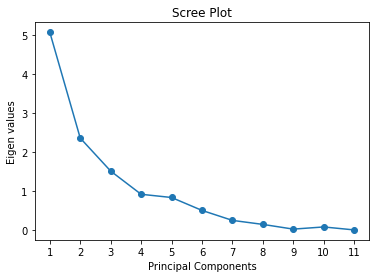

In [14]:
plt.plot(np.arange(1,12),eig_vals,marker='o')
plt.xticks(np.arange(1,12))
plt.xlabel('Principal Components')
plt.ylabel('Eigen values')
plt.title('Scree Plot')

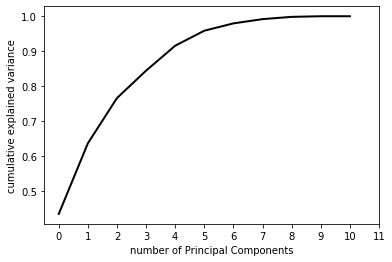

In [15]:
pca = PCA().fit(data_features_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=2,color='black')
plt.xlabel('number of Principal Components')
plt.ylabel('cumulative explained variance')

plt.xticks(np.arange(0,12))

#plt.axvline(5, c='b')
#plt.axhline(0.96, c='r')
plt.show()

# Step 5:  Reduce the dimensionality of the data set

In [16]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC'+str(i) for i in range(1,6)])
principalDf

,PC1,PC2,PC3,PC4,PC5
0,-7.531841,21.876682,-4.060674,-0.691062,-0.028993
1,-10.410017,1.706458,6.502017,-0.330239,0.646932
2,12.317449,16.387015,-4.015492,0.073970,0.396844
3,-9.012436,5.920269,-4.269608,-0.405028,-0.392923
4,-8.647823,4.689225,6.174392,-0.472267,-0.176771
5,-5.494574,-12.373357,-3.753884,-0.187235,-0.226389
6,-0.641299,-0.890562,2.900348,0.986835,-0.525922
7,-6.502059,-1.473380,2.330981,0.260464,-0.285966
8,2.749234,-11.592551,-3.244242,-0.306604,0.029304
9,-1.154940,-17.559345,-2.448259,0.551802,0.178685


In [17]:
finalDf = pd.concat([data_independent,principalDf],axis=1)
finalDf

,Field,PC1,PC2,PC3,PC4,PC5
0,1,-7.531841,21.876682,-4.060674,-0.691062,-0.028993
1,2,-10.410017,1.706458,6.502017,-0.330239,0.646932
2,3,12.317449,16.387015,-4.015492,0.073970,0.396844
3,4,-9.012436,5.920269,-4.269608,-0.405028,-0.392923
4,5,-8.647823,4.689225,6.174392,-0.472267,-0.176771
5,6,-5.494574,-12.373357,-3.753884,-0.187235,-0.226389
6,7,-0.641299,-0.890562,2.900348,0.986835,-0.525922
7,8,-6.502059,-1.473380,2.330981,0.260464,-0.285966
8,9,2.749234,-11.592551,-3.244242,-0.306604,0.029304
9,10,-1.154940,-17.559345,-2.448259,0.551802,0.178685


In [18]:

principalComponents
#eig_vals.shape

array([[ -7.53184117,  21.87668208,  -4.06067416,  -0.69106206,
         -0.02899276],
       [-10.41001731,   1.70645784,   6.50201727,  -0.33023891,
          0.64693171],
       [ 12.31744892,  16.38701487,  -4.01549246,   0.07396997,
          0.39684432],
       [ -9.0124357 ,   5.92026948,  -4.26960752,  -0.40502814,
         -0.39292293],
       [ -8.64782296,   4.68922541,   6.17439158,  -0.47226747,
         -0.17677106],
       [ -5.49457367, -12.3733572 ,  -3.75388393,  -0.18723474,
         -0.22638905],
       [ -0.64129942,  -0.89056196,   2.90034764,   0.98683538,
         -0.52592243],
       [ -6.50205935,  -1.47338041,   2.33098132,   0.26046368,
         -0.2859662 ],
       [  2.74923362, -11.59255096,  -3.24424192,  -0.30660417,
          0.02930359],
       [ -1.15493996, -17.55934495,  -2.44825917,   0.55180234,
          0.1786852 ],
       [ -4.74772299, -14.35621657,   1.57981434,  -0.75871136,
          0.19697122],
       [  0.19980612,   1.19362571,  -2.718

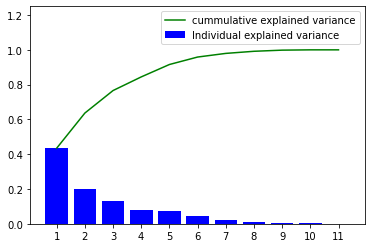

In [20]:
plt.bar(np.arange(1,12),pca.explained_variance_ratio_,label='Individual explained variance',color='b')
plt.plot(np.arange(1,12),np.cumsum(pca.explained_variance_ratio_),label='cummulative explained variance',color='g')
plt.xticks(np.arange(1,12))
plt.ylim(0,1.25)
plt.legend()